See how to use Shor's algorithm to factor 15 here:    <b><a href="https://portal.quantumrings.com/doc/Shors.html">Shor15</a></b>

<i><b>Source code to factorize 15</b></i>

Note: Be sure to use your API token and your account name.

Step 1. Import the required modules and obtain the backend

In [1]:
import QuantumRingsLib
from QuantumRingsLib import QuantumRegister, AncillaRegister, ClassicalRegister, QuantumCircuit
from QuantumRingsLib import QuantumRingsProvider
from QuantumRingsLib import job_monitor
from QuantumRingsLib import JobStatus
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
from QuantumRingsLib import QuantumRingsProvider

provider = QuantumRingsProvider(
    token='rings-200.tgGDmsBUuh8pqz21JO21ACa1bR6u6uZr',
    name='dignp5@yonsei.ac.kr'
)
shots = 1024

provider.active_account()

{'name': 'dignp5@yonsei.ac.kr',
 'token': 'rings-200.tgGDmsBUuh8pqz21JO21ACa1bR6u6uZr',
 'max_qubits': '200'}

Step 2. Define the core methods

In [3]:
def iqft_cct(qc, b, n):
    """
    The inverse QFT circuit

    Args:

        qc (QuantumCircuit):
                The quantum circuit

        b (QuantumRegister):
                The target register

        n (int):
                The number of qubits in the registers to use

    Returns:
        None

    """

    for i in range (n):
        for j in range (1, i+1):
            # for inverse transform, we have to use negative angles
            qc.cu1(  -math.pi / 2** ( i -j + 1 ), b[j - 1], b[i])
        # the H transform should be done after the rotations
        qc.h(b[i])
    qc.barrier()
    return

def plot_histogram (counts, title=""):
    """
    Plots the histogram of the counts

    Args:

        counts (dict):
            The dictionary containing the counts of states

        titles (str):
            A title for the graph.

    Returns:
        None

    """
    fig, ax = plt.subplots(figsize =(10, 7))
    plt.xlabel("States")
    plt.ylabel("Counts")
    mylist = [key for key, val in counts.items() for _ in range(val)]

    unique, inverse = np.unique(mylist, return_inverse=True)
    bin_counts = np.bincount(inverse)

    plt.bar(unique, bin_counts)

    maxFreq = max(counts.values())
    plt.ylim(ymax=np.ceil(maxFreq / 10) * 10 if maxFreq % 10 else maxFreq + 10)
    # Show plot
    plt.title(title)
    plt.show()
    return

Step 3. Perform the algorithm

In [4]:
# Shor’s algorithm to factorize 15 using 7^x mod 15.
numberofqubits = 7
shots = 1024

q = QuantumRegister(numberofqubits , 'q')
c = ClassicalRegister(4 , 'c')
qc = QuantumCircuit(q, c)

# Initialize source and target registers
qc.h(0)
qc.h(1)
qc.h(2)
qc.x(6)
qc.barrier()

# Modular exponentiation 7^x mod 15
qc.cx(q[2],q[4] )
qc.cx(q[2],q[5] )
qc.cx(q[6],q[4] )
qc.ccx(q[1],q[5],q[3] )
qc.cx(q[3],q[5] )
qc.ccx(q[1],q[4],q[6] )
qc.cx(q[6],q[4] ) #
qc.barrier()

# IQFT. Refer to implementation from earlier examples
iqft_cct (qc, q, 3)

# Measure
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

# Draw the circuit
qc.draw('mpl')

       ┌───┐ ╎                                     ╎ ┌───┐               »
q[0]: ■┤ H ├─╎─────────────────────────────────────╎─┤ H ├───────■───────»
       ├───┤ ╎                                     ╎ └───┘┌──────┴──────┐»
q[1]: ■┤ H ├─╎──────────────────■─────────■────────╎──────┤ U1(-pi/2)   ├»
       ├───┤ ╎                  │         │        ╎      └─────────────┘»
q[2]: ■┤ H ├─╎───■────■─────────│─────────│────────╎─────────────────────»
       └───┘ ╎   │    │       ┌─┴─┐       │        ╎                     »
q[3]: ■──────╎───│────│───────┤ X ├──■────│────────╎─────────────────────»
             ╎ ┌─┴─┐  │  ┌───┐└─┬─┘  │    │  ┌───┐ ╎                     »
q[4]: ■──────╎─┤ X ├──│──┤ X ├──│────│────■──┤ X ├─╎─────────────────────»
             ╎ └───┘┌─┴─┐└─┬─┘  │  ┌─┴─┐  │  └─┬─┘ ╎                     »
q[5]: ■──────╎──────┤ X ├──│────■──┤ X ├──│────│───╎─────────────────────»
       ┌───┐ ╎      └───┘  │       └───┘┌─┴─┐  │   ╎                     »
q[6]: ■┤ X ├─╎───────────

The circuit to factor 15 shown above.

In [5]:
# Execute the circuit
job = backend.run(qc, shots=shots)
job_monitor(job)
result = job.result()
counts = result.get_counts()

# visualize
plot_histogram(counts)

#clean up
del q, c, qc
del result
del job

NameError: name 'backend' is not defined

A plot of the execution results is shown above. Compare this with the calculated values.

Footnotes

[1] This section is based on [10], [14], and [16].

[2] https://research.ibm.com/blog/factor-15-shors-algorithm

[3] https://en.wikipedia.org/wiki/Integer_factorization_records#Records_for_efforts_by_quantum_computers

Factor Large Semiprime Integers
------------------
Use quantum algorithms to tackle a prepared list of semiprime integers, from an approachable 8-bit number and growing to numbers beyond sizes that are yet known to have been factored using quantum algorithms.

In [6]:
from semiprimes import semiprimes

# Create the desired dictionary format
formatted_dict = {f"{period}": value for period, value in semiprimes.items()}

# Print the result
for period, semiprime in formatted_dict.items():
    print(f"{period}: {semiprime}")

8: 143
10: 899
12: 3127
14: 11009
16: 47053
18: 167659
20: 744647
22: 3036893
24: 11426971
26: 58949987
28: 208241207
30: 857830637
32: 2776108693
34: 11455067797
36: 52734393667
38: 171913873883
40: 862463409547
42: 2830354423669
44: 12942106192073
46: 53454475917779
48: 255975740711783
50: 696252032788709
52: 3622511636491483
54: 15631190744806271
56: 51326462028714137
58: 217320198167105543
60: 827414216976034907
62: 3594396771839811733
64: 13489534701147995111
66: 48998116978431560767
68: 220295379750460962499
70: 757619317101213697553
72: 4239706985407101925109
74: 13081178794322790282667
76: 48581232636534199345531
78: 263180236071092621088443
80: 839063370715343025081359
82: 3145102596907521247788809
84: 13410747867593584234359179
86: 74963308816794035875414187
88: 196328049947816898123437813
90: 900212494943030042797046797
92: 3408479268382267351010110507
94: 13410207519922000104514406009
96: 56540697284955642837798912007
98: 212736089539904961817389577063
100: 7933341806242722

Finding Periodic Function
------------

In [7]:
# pylint: disable=invalid-name
import matplotlib.pyplot as plt
import numpy as np
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")

Imports Successful


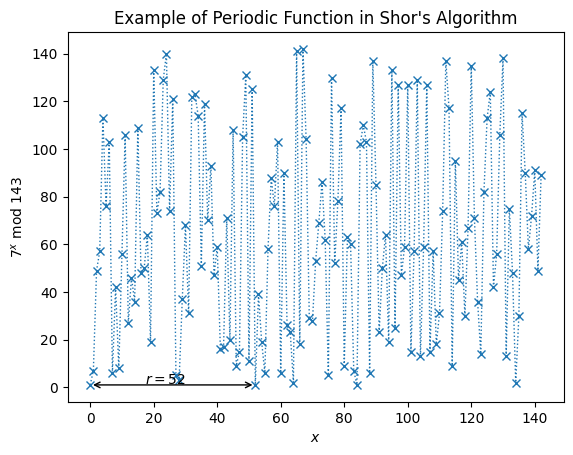

In [8]:
N = 143
a = 7

# Calculate the plotting data
xvals = np.arange(N)
yvals = [np.mod(a**x, N) for x in xvals]

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel=f'${a}^x$ mod ${N}$',
       title="Example of Periodic Function in Shor's Algorithm")
try: # plot r on the graph
    r = yvals[1:].index(1) + 1
    plt.annotate('', xy=(0,1), xytext=(r,1),
                 arrowprops=dict(arrowstyle='<->'))
    plt.annotate(f'$r={r}$', xy=(r/3,1.5))
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

In [9]:
print(r)

52


## Modular Exponentiation

You may have noticed that the method of creating the $U^{2^j}$ gates by repeating $U$ grows exponentially with $j$ and will not result in a polynomial time algorithm. We want a way to create the operator:

$$ U^{2^j}|y\rangle = |a^{2^j}y \bmod N \rangle $$

that grows polynomially with $j$. Fortunately, calculating:

$$ a^{2^j} \bmod N$$

efficiently is possible. Classical computers can use an algorithm known as _repeated squaring_ to calculate an exponential. In our case, since we are only dealing with exponentials of the form $2^j$, the repeated squaring algorithm becomes very simple:

In [10]:
def a2jmodN(a, j, N):
    """Compute a^{2^j} (mod N) by repeated squaring"""
    for _ in range(j):
        a = np.mod(a**2, N)
    return a

In [11]:
a2jmodN(7, 2049, 53)

np.int64(47)

If an efficient algorithm is possible in Python, then we can use the same algorithm on a quantum computer. Unfortunately, despite scaling polynomially with $j$, modular exponentiation circuits are not straightforward and are the bottleneck in Shor’s algorithm. A beginner-friendly implementation can be found in reference [1].

## Factoring from Period Finding

Not all factoring problems are difficult; we can spot an even number instantly and know that one of its factors is 2. In fact, there are [specific criteria](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.186-4.pdf#%5B%7B%22num%22%3A127%2C%22gen%22%3A0%7D%2C%7B%22name%22%3A%22XYZ%22%7D%2C70%2C223%2C0%5D) for choosing numbers that are difficult to factor, but the basic idea is to choose the product of two large prime numbers.

A general factoring algorithm will first check to see if there is a shortcut to factoring the integer (is the number even? Is the number of the form $N = a^b$?), before using Shor’s period finding for the worst-case scenario. Since we aim to focus on the quantum part of the algorithm, we will jump straight to the case in which N is the product of two primes.

### Example: Factoring 15

To see an example of factoring on a small number of qubits, we will factor 15, which we all know is the product of the not-so-large prime numbers 3 and 5.

In [12]:
N = 15

The first step is to choose a random number, $a$, between $1$ and $N-1$:

In [13]:
np.random.seed(1) # This is to make sure we get reproduceable results
a = randint(2, 15)
print(a)

7


Next we quickly check it isn't already a non-trivial factor of $N$:

In [14]:
from math import gcd # greatest common divisor
gcd(a, N)

1

Great. Next, we do Shor's order finding algorithm for `a = 7` and `N = 15`. Remember that the phase we measure will be $s/r$ where:

$$ a^r \bmod N = 1 $$

and $s$ is a random integer between 0 and $r-1$.

In [15]:
# Import the required modules
from qiskit.circuit import QuantumCircuit
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

In [16]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

In [17]:
# Specify variables
N_COUNT = 8  # number of counting qubits
a = 7

In [18]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [19]:
# Create QuantumCircuit with N_COUNT counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(N_COUNT + 4, N_COUNT)

# Initialize counting qubits
# in state |+>
for q in range(N_COUNT):
    qc.h(q)

# And auxiliary register in state |1>
qc.x(N_COUNT)

# Do controlled-U operations
for q in range(N_COUNT):
    qc.append(c_amod15(a, 2**q),
             [q] + [i+N_COUNT for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(N_COUNT), range(N_COUNT))

# Measure circuit
qc.measure(range(N_COUNT), range(N_COUNT))
qc.draw(fold=-1)  # -1 means 'do not fold'

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ─────┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

In [20]:
from quantumrings.toolkit.qiskit import QrBackendV2

mybackend = QrBackendV2(provider, num_qubits = qc.num_qubits)
qc_transpiled = transpile(qc, mybackend, initial_layout=[i for i in range(0, qc.num_qubits)])
job = mybackend.run(qc_transpiled, shots = shots)

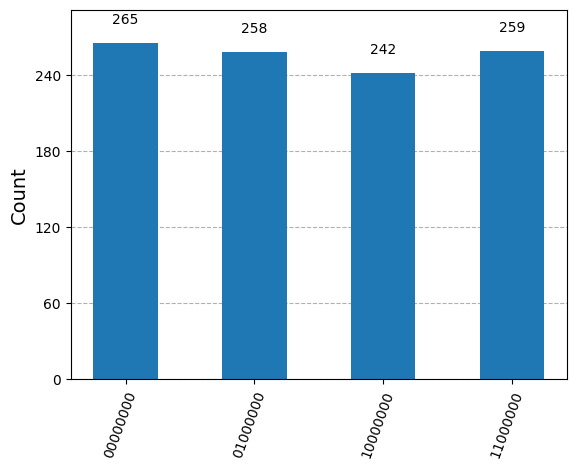

In [21]:
counts = job.result().get_counts()
plot_histogram(counts)

In [22]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**N_COUNT)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**N_COUNT} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  00000000(bin) =   0(dec)    0/256 = 0.00
1  01000000(bin) =  64(dec)   64/256 = 0.25
2  10000000(bin) = 128(dec)  128/256 = 0.50
3  11000000(bin) = 192(dec)  192/256 = 0.75


In [23]:
Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

In [24]:
# Get fraction that most closely resembles 0.666
# with denominator < 15
Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

In [25]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.00      0/1            1
1   0.25      1/4            4
2   0.50      1/2            2
3   0.75      3/4            4


In [26]:
def a2jmodN(a, j, N):
    """Compute a^{2^j} (mod N) by repeated squaring"""
    for _ in range(j):
        a = np.mod(a**2, N)
    return a

In [27]:
a2jmodN(7, 2049, 53)

np.int64(47)

## Factoring from Period Finding

### Example: Factoring 15

To see an example of factoring on a small number of qubits, we will factor 15, which we all know is the product of the not-so-large prime numbers 3 and 5.

In [28]:
import numpy as np
from random import randint
from math import gcd

N = 143  # Semiprime
np.random.seed(1)  # To make sure we get reproducible results

# Generate random a such that gcd(a, N) = 1
a = randint(2, 15)
while gcd(a, N) != 1:
    a = randint(2, N)

print("Random a such that gcd(a, N) = 1:", a)

Random a such that gcd(a, N) = 1: 5


In [29]:
def qpe_amod15(a):
    """Performs quantum phase estimation on the operation a*r mod 15.
    Args:
        a (int): This is 'a' in a*r mod 15
    Returns:
        float: Estimate of the phase
    """
    N_COUNT = 8
    qc = QuantumCircuit(4+N_COUNT, N_COUNT)
    for q in range(N_COUNT):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(N_COUNT) # And auxiliary register in state |1>
    for q in range(N_COUNT): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q),
                 [q] + [i+N_COUNT for i in range(4)])
    qc.append(qft_dagger(N_COUNT), range(N_COUNT)) # Do inverse-QFT
    qc.measure(range(N_COUNT), range(N_COUNT))
    # Simulate Results
    # `memory=True` tells the backend to save each measurement in a list
    qc_transpiled = transpile(qc, mybackend, initial_layout=[i for i in range(0, qc.num_qubits)])
    job = mybackend.run(qc_transpiled, shots = shots)
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**N_COUNT)
    print(f"Corresponding Phase: {phase}")
    return phase

In [ ]:
N_COUNT = 8
qc = QuantumCircuit(4+N_COUNT, N_COUNT)
for q in range(N_COUNT):
    qc.h(q)     # Initialize counting qubits in state |+>
qc.x(N_COUNT) # And auxiliary register in state |1>
for q in range(N_COUNT): # Do controlled-U operations
    qc.append(c_amod15(a, 2**q),
                [q] + [i+N_COUNT for i in range(4)])
qc.append(qft_dagger(N_COUNT), range(N_COUNT)) # Do inverse-QFT
qc.measure(range(N_COUNT), range(N_COUNT))
qc.draw('mpl')

In [ ]:
phase = qpe_amod15(a) # Phase = s/r

In [32]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

4


In [33]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[1, 13]


In [ ]:
FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nATTEMPT {ATTEMPT}:")
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print(f"Result: r = {r}")
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                # Guess is a factor!
                print(f"*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True

## Main Code

In [45]:
import numpy as np
from random import randint
from math import gcd, ceil
from qiskit import QuantumCircuit, transpile
from math import gcd
import numpy as np
from fractions import Fraction
from quantumrings.toolkit.qiskit import QrBackendV2

In [46]:
def generate_a(N, seed=1):
    """Generate a random integer 'a' such that gcd(a, N) = 1."""
    np.random.seed(seed)  # Set random seed for reproducibility
    
    a = randint(2, N)  # Random number between 2 and N-1
    while gcd(a, N) != 1:
        a = randint(2, N - 1)
    
    return a

In [47]:
def qft_dagger(num_qubits):
    """Creates the inverse Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(num_qubits)
    for qubit in range(num_qubits // 2):
        qc.swap(qubit, num_qubits - qubit - 1)
    for j in range(num_qubits):
        for m in range(j):
            qc.cp(-np.pi / float(2 ** (j - m)), m, j)
        qc.h(j)
    return qc

In [48]:
def c_amodN(a, power, N):
    """Controlled multiplication by a mod N, where N is a semiprime."""
    if gcd(a, N) != 1:
        raise ValueError(f"a={a} must be coprime to N={N}.")
    
    n_qubits = len(bin(N)) - 2  # Minimum number of qubits to represent N
    U = QuantumCircuit(n_qubits)
    
    for _ in range(power):
        for qubit in range(n_qubits - 1):
            U.cx(qubit, (qubit + 1) % n_qubits)  # Placeholder for modular multiplication logic
    
    U = U.to_gate()
    U.name = f"{a}^{power} mod {N}"
    return U.control()

In [54]:
def qpe_amodN(a, N, provider, shots):
    """Performs quantum phase estimation on a*r mod N."""
    # Number of counting qubits
    N_COUNT = ceil(np.log2(N)) + 3
    n = ceil(np.log2(N))  # Number of qubits for auxiliary register
    
    # Create the quantum circuit
    qc = QuantumCircuit(N_COUNT + n, N_COUNT)
    
    # Initialize counting qubits to |+>
    for q in range(N_COUNT):
        qc.h(q)
    
    # Initialize the auxiliary register to |1>
    qc.x(N_COUNT)
    
    # Apply controlled-U operations
    for q in range(N_COUNT):
        qc.append(c_amodN(a, 2**q, N), [q] + [i + N_COUNT for i in range(n)])
    
    # Apply the inverse QFT
    qc.append(qft_dagger(N_COUNT), range(N_COUNT))
    
    # Measure the counting qubits
    qc.measure(range(N_COUNT), range(N_COUNT))
    
    # Transpile and execute
    backend = QrBackendV2(provider, num_qubits = qc.num_qubits)
    print(f"number of qubits: {qc.num_qubits}")
    qc_transpiled = transpile(qc, backend)
    job = backend.run(qc_transpiled, shots=shots)
    readings = job.result().get_memory()
    
    # Convert the measurement to phase
    most_common = max(set(readings), key=readings.count)
    phase = int(most_common, 2) / (2 ** N_COUNT)
    
    print(f"Register Reading: {most_common}")
    print(f"Corresponding Phase: {phase}")
    return phase


In [55]:
def find_factors(N, provider, shots=1024):
    """Shor's algorithm for finding non-trivial factors of N."""
    FACTOR_FOUND = False
    ATTEMPT = 0
    
    while not FACTOR_FOUND:
        ATTEMPT += 1
        print(f"\nATTEMPT {ATTEMPT}:")
        
        # Generate a random 'a' coprime to N
        a = generate_a(N)  
        print(f"Chosen 'a': {a}")
        
        # Perform QPE
        phase = qpe_amodN(a, N, provider, shots)  # Phase = s / r
        
        # Convert the phase to a rational approximation s/r
        frac = Fraction(phase).limit_denominator(N)
        r = frac.denominator
        print(f"Phase: {phase}, Approximated r = {r}")
        
        if r % 2 != 0 or pow(a, r // 2, N) in [0, 1, N - 1]:
            print("Invalid r, retrying...")
            continue  # Retry if r is odd or doesn't give non-trivial factors
        
        # Compute potential factors
        guesses = [gcd(pow(a, r // 2) - 1, N), gcd(pow(a, r // 2) + 1, N)]
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        
        # Check the guesses
        for guess in guesses:
            if guess not in [1, N] and (N % guess) == 0:
                print(f"*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True
                return guess, N // guess  # Return the two factors
    
    print("No factors found.")
    return None, None

In [56]:
from QuantumRingsLib import QuantumRingsProvider

provider = QuantumRingsProvider(
    token='rings-200.tgGDmsBUuh8pqz21JO21ACa1bR6u6uZr',
    name='dignp5@yonsei.ac.kr'
)
shots = 1024

provider.active_account()

{'name': 'dignp5@yonsei.ac.kr',
 'token': 'rings-200.tgGDmsBUuh8pqz21JO21ACa1bR6u6uZr',
 'max_qubits': '200'}

In [57]:
N = 21
factor1, factor2 = find_factors(N, provider)
print(f"\nFactors of {N}: {factor1}, {factor2}")


ATTEMPT 1:
Chosen 'a': 10
number of qubits: 13
Register Reading: 00000000
Corresponding Phase: 0.0
Phase: 0.0, Approximated r = 1
Invalid r, retrying...

ATTEMPT 2:
Chosen 'a': 2
number of qubits: 13
Register Reading: 01000000
Corresponding Phase: 0.25
Phase: 0.25, Approximated r = 4
Guessed Factors: 3 and 1
*** Non-trivial factor found: 3 ***

Factors of 21: 3, 7


In [58]:
N = 38
factor1, factor2 = find_factors(N, provider)
print(f"\nFactors of {N}: {factor1}, {factor2}")


ATTEMPT 1:
Chosen 'a': 3
number of qubits: 15
Register Reading: 001000000
Corresponding Phase: 0.125
Phase: 0.125, Approximated r = 8
Guessed Factors: 2 and 2
*** Non-trivial factor found: 2 ***

Factors of 38: 2, 19


In [ ]:
from semiprimes import semiprimes

# Create the desired dictionary format
formatted_dict = {f"{period}": value for period, value in semiprimes.items()}

# Print the result
for period, semiprime in formatted_dict.items():
    print(f"{period}: {semiprime}")
    N = semiprime
    factor1, factor2 = find_factors(N, provider)
    print(f"\nFactors of {N}: {factor1}, {factor2}")
    print("--------------------------------------------------")

8: 143

ATTEMPT 1:
Chosen 'a': 93
number of qubits: 19
Register Reading: 00100000000
Corresponding Phase: 0.125
Phase: 0.125, Approximated r = 8
Guessed Factors: 1 and 1

ATTEMPT 2:
Chosen 'a': 16
number of qubits: 19
Register Reading: 11100000000
Corresponding Phase: 0.875
Phase: 0.875, Approximated r = 8
Guessed Factors: 1 and 1

ATTEMPT 3:
Chosen 'a': 25
number of qubits: 19
Register Reading: 01000000000
Corresponding Phase: 0.25
Phase: 0.25, Approximated r = 4
Guessed Factors: 13 and 1
*** Non-trivial factor found: 13 ***

Factors of 143: 13, 11
--------------------------------------------------
10: 899

ATTEMPT 1:
Chosen 'a': 665
number of qubits: 23
Register Reading: 1001000000000
Corresponding Phase: 0.5625
Phase: 0.5625, Approximated r = 16
Guessed Factors: 1 and 1

ATTEMPT 2:
Chosen 'a': 601
number of qubits: 23
